#### Draw R2 change

In [1]:
# Imports
import os
import numpy as np
import nibabel as nb
import pandas as pd
import warnings
import pingouin

warnings.filterwarnings('ignore')

# Figure imports
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.express as px
from plot_utils import plotly_template

# stats
from scipy.stats import permutation_test
def statistic(condA, condB, axis):
    return np.nanmean(condA, axis=axis) - np.nanmean(condB, axis=axis)
n_permutation = 10000

def get_pval(perm_res):
    p_val_unilateral = perm_res.pvalue/2
    p_val_bilateral = perm_res.pvalue

    if p_val_unilateral > 0.05: p_text_unilateral = 'p = {:1.2f}'.format(p_val_unilateral)
    if p_val_unilateral < 0.05: p_text_unilateral = 'p < 0.05'
    if p_val_unilateral < 0.01: p_text_unilateral = 'p < 0.01'
    if p_val_unilateral < 0.001: p_text_unilateral = 'p < 0.001'
    if p_val_unilateral < 0.0001: p_text_unilateral = 'p < 0.0001'

    if p_val_bilateral > 0.05: p_text_bilateral = 'p = {:1.2f}'.format(p_val_bilateral)
    if p_val_bilateral < 0.05: p_text_bilateral = 'p < 0.05'
    if p_val_bilateral < 0.01: p_text_bilateral = 'p < 0.01'
    if p_val_bilateral < 0.001: p_text_bilateral = 'p < 0.001'
    if p_val_bilateral < 0.0001: p_text_bilateral = 'p < 0.0001'
    
    return (p_val_unilateral, p_text_unilateral, p_val_bilateral, p_text_bilateral)


# Define folders
base_dir = '/home/mszinte/disks/meso_S/data/gaze_prf'
bids_dir = "{}".format(base_dir)
pp_dir = "{}/derivatives/pp_data".format(base_dir)
group_tsv_dir = '{}/{}/prf/tsv'.format(pp_dir, 'group')

# settings
subjects = ['sub-001', 'sub-002', 'sub-003', 'sub-004',
            'sub-005', 'sub-006', 'sub-007', 'sub-008']
subjects_plot = ['sub-001', 'sub-002', 'sub-003', 'sub-004',
                 'sub-005', 'sub-006', 'sub-007', 'sub-008', 'group']
tasks = ['FullScreen', 'FullScreenAttendFix', 'FullScreenAttendBar']
rois = ['V1', 'V2', 'V3', 'V3AB', 'hMT+', 'LO',
        'VO', 'iIPS', 'sIPS', 'iPCS', 'sPCS', 'mPCS']

best_voxels_num = 250
type_analyses = ['','_best{}'.format(best_voxels_num)]


# general figure settings
template_specs = dict(  axes_color="rgba(0, 0, 0, 1)",
                        axes_width=2,
                        axes_font_size=13,
                        bg_col="rgba(255, 255, 255, 1)",
                        font='Arial',
                        title_font_size=15,
                        plot_width=1.5)

fig_template = plotly_template(template_specs)


# Subplot settings
margin_t, margin_b, margin_l, margin_r = 50, 100, 100 ,50
rows, cols = 1, 2

column_widths,row_heights = [1,1], [1]
sb_specs = [[{},{}]]
subplot_width, subplot_height = 300,700

fig_width, fig_height = 0, 0
for column_width in column_widths:fig_width += subplot_width*column_width
for row_height in row_heights: fig_height +=subplot_height*row_height
fig_width = fig_width + margin_l + margin_r
fig_height = fig_height + margin_t + margin_b

hovertemplate = 'ROI: %{y}<br>' + 'R2 change: %{x:1.2f}'


yaxis_range = [0.3, 12.7]
yaxis_tick = 12
yaxis_tickvals = np.flipud(np.linspace(1,12,yaxis_tick))
yaxis_ticktext = rois
y_rois = np.flipud(np.arange(0,len(rois))+1)

retino_col = 'rgba(227, 6, 19, 1)'
spatio_col = 'rgba(29, 113, 184, 1)'


saving /home/mszinte/disks/meso_S/data/gaze_prf/derivatives/pp_data/group/prf/tsv/group_task-AttendFix_retino_spatio_r2change_stats.tsv
saving /home/mszinte/disks/meso_S/data/gaze_prf/derivatives/pp_data/group/prf/tsv/group_task-AttendBar_retino_spatio_r2change_stats.tsv


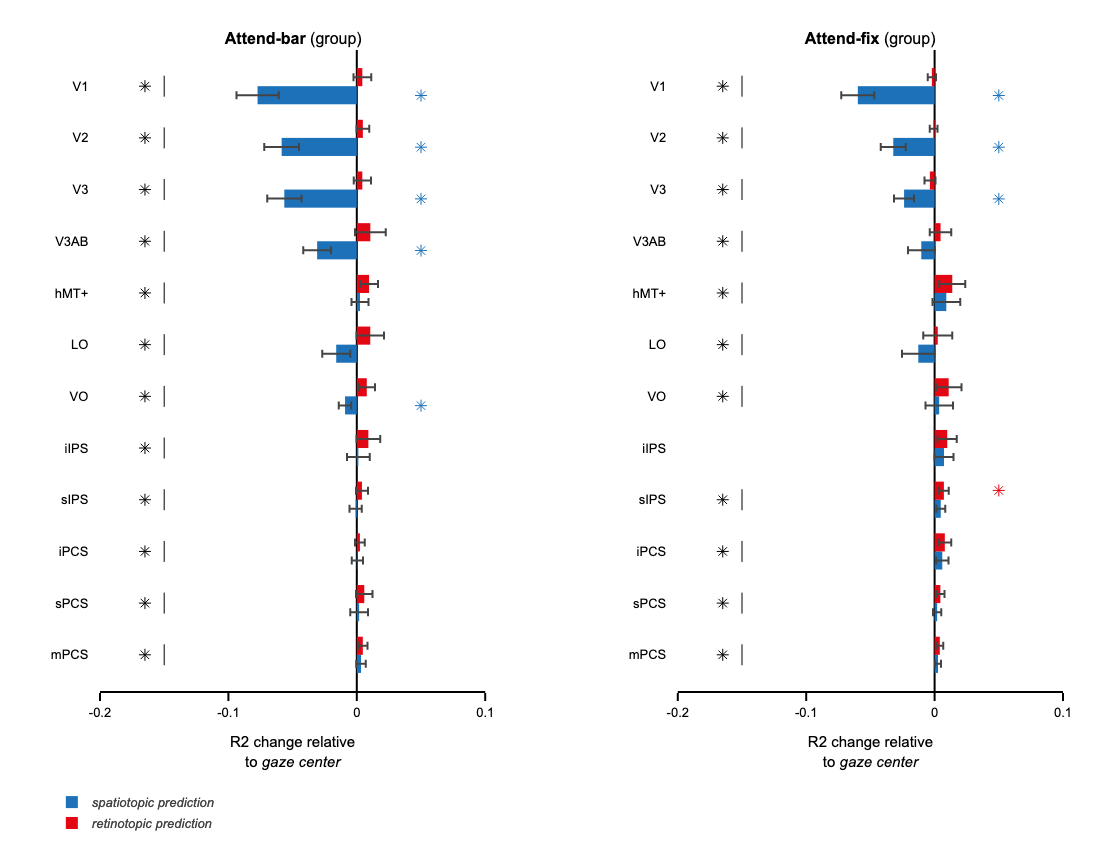

saving /home/mszinte/disks/meso_S/data/gaze_prf/derivatives/pp_data/group/prf/tsv/group_task-AttendFix_retino_spatio_r2change_stats_best250.tsv
saving /home/mszinte/disks/meso_S/data/gaze_prf/derivatives/pp_data/group/prf/tsv/group_task-AttendBar_retino_spatio_r2change_stats_best250.tsv


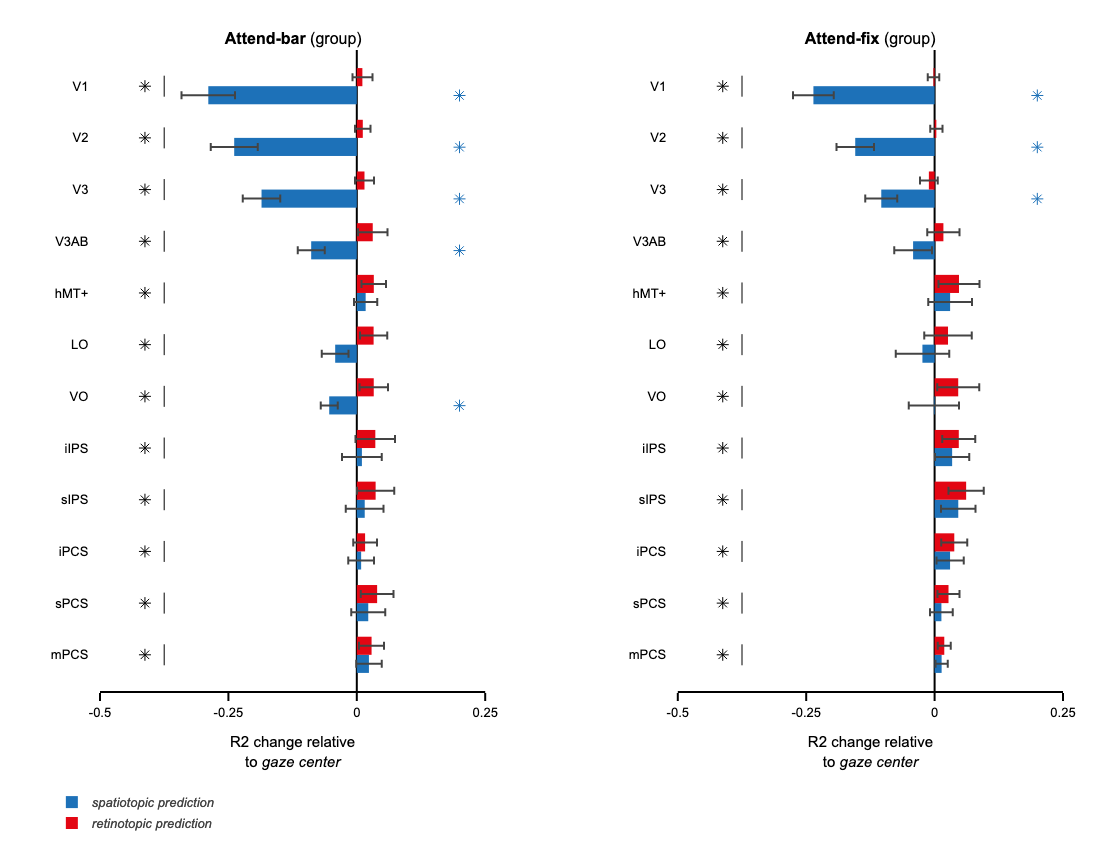

In [5]:
# load TSV
for type_analysis in type_analyses:    
    for subject_num, subject in enumerate(subjects):
        tsv_dir = '{}/{}/prf/tsv'.format(pp_dir, subject)
        df_fn = "{}/{}_all_res{}.pkl".format(tsv_dir, subject, type_analysis)
        df_sub = pd.read_pickle(df_fn)

        # create new df
        df_new = pd.DataFrame({'subject': df_sub.subject}) 
        df_new['roi'] = df_sub.roi

        # compute mean change relative to gaze center
        df_new['retino_pred_ab_r2_change']= ((df_sub.retino_pred_gl_ab_r2 - df_sub.retino_pred_gc_ab_r2) + (df_sub.retino_pred_gr_ab_r2 - df_sub.retino_pred_gc_ab_r2)/2.0)
        df_new['retino_pred_af_r2_change']= ((df_sub.retino_pred_gl_af_r2 - df_sub.retino_pred_gc_af_r2) + (df_sub.retino_pred_gr_af_r2 - df_sub.retino_pred_gc_af_r2)/2.0)

        df_new['spatio_pred_ab_r2_change']= ((df_sub.spatio_pred_gl_ab_r2 - df_sub.spatio_pred_gc_ab_r2) + (df_sub.spatio_pred_gr_ab_r2 - df_sub.spatio_pred_gc_ab_r2)/2.0)
        df_new['spatio_pred_af_r2_change']= ((df_sub.spatio_pred_gl_af_r2 - df_sub.spatio_pred_gc_af_r2) + (df_sub.spatio_pred_gr_af_r2 - df_sub.spatio_pred_gc_af_r2)/2.0)

        # across roi
        if subject_num > 0: 
            df = pd.concat([df,df_new], ignore_index=True)
        else:
            df = df_new

    df.roi = pd.Categorical(df.roi,categories=rois)
    
    # Compute permutation statistics results
    for cond in ['af','ab']:
        for roi_num, roi in enumerate(rois):

            
            retino_r2change_array = df.loc[(df.roi == roi)].groupby(['subject'])['retino_pred_{}_r2_change'.format(cond)].mean()
            spatio_r2change_array = df.loc[(df.roi == roi)].groupby(['subject'])['spatio_pred_{}_r2_change'.format(cond)].mean()
            zero_r2change__index_array = np.zeros_like(retino_r2change_array)

            # retino vs. spatio
            retino_spatio_perm_res = permutation_test((retino_r2change_array, spatio_r2change_array), statistic, n_resamples=n_permutation, 
                                        alternative='two-sided', permutation_type='samples', vectorized=True, axis=0)

            retino_spatio_p_val_uni, retino_spatio_p_text_uni, retino_spatio_p_val_bi, retino_spatio_p_text_bi = get_pval(retino_spatio_perm_res)
            
            # retino vs. zero 
            retino_zero_perm_res = permutation_test((retino_r2change_array, zero_r2change__index_array), statistic, n_resamples=n_permutation, 
                                alternative='two-sided', permutation_type='samples', vectorized=True, axis=0)
            retino_zero_p_val_uni, retino_zero_p_text_uni, retino_zero_p_val_bi, retino_zero_p_text_bi = get_pval(retino_zero_perm_res)
            
            # spatio vs. zero 
            spatio_zero_perm_res = permutation_test((spatio_r2change_array, zero_r2change__index_array), statistic, n_resamples=n_permutation, 
                                alternative='two-sided', permutation_type='samples', vectorized=True, axis=0)
            spatio_zero_p_val_uni, spatio_zero_p_text_uni, spatio_zero_p_val_bi, spatio_zero_p_text_bi = get_pval(spatio_zero_perm_res)


            df_stats = pd.DataFrame({  'roi': [roi],
                                       'cond': [cond],
                                       'retino_r2change_mean': np.nanmean(retino_r2change_array),
                                       'retino_r2change_sem': np.nanstd(retino_r2change_array)/np.sqrt(retino_r2change_array.shape[0]-1),
                                       'spatio_r2change_mean': np.nanmean(spatio_r2change_array),
                                       'spatio_r2change_sem': np.nanstd(spatio_r2change_array)/np.sqrt(retino_r2change_array.shape[0]-1),
                                       'retino_spatio_diff': retino_spatio_perm_res.statistic,
                                       'retino_spatio_p_val_unilateral': retino_spatio_p_val_uni,
                                       'retino_spatio_p_text_unilateral': retino_spatio_p_text_uni,
                                       'retino_spatio_p_val_bilateral': retino_spatio_p_val_bi,
                                       'retino_spatio_p_text_bilateral': retino_spatio_p_text_bi,
                                       'retino_zero_diff': retino_zero_perm_res.statistic,
                                       'retino_zero_p_val_unilateral': retino_zero_p_val_uni,
                                       'retino_zero_p_text_unilateral': retino_zero_p_text_uni,
                                       'retino_zero_p_val_bilateral': retino_zero_p_val_bi,
                                       'retino_zero_p_text_bilateral': retino_zero_p_text_bi,
                                       'spatio_zero_diff': spatio_zero_perm_res.statistic,
                                       'spatio_zero_p_val_unilateral': spatio_zero_p_val_uni,
                                       'spatio_zero_p_text_unilateral': spatio_zero_p_text_uni,
                                       'spatio_zero_p_val_bilateral': spatio_zero_p_val_bi,
                                       'spatio_zero_p_text_bilateral': spatio_zero_p_text_bi})
            # across roi
            if roi_num == 0: df_stats_roi = df_stats
            else: df_stats_roi = pd.concat([df_stats_roi, df_stats])

        if cond == 'ab': df_stats_roi_fn = "{}/group_task-AttendBar_retino_spatio_r2change_stats{}.tsv".format(group_tsv_dir,type_analysis)
        elif cond == 'af': df_stats_roi_fn = "{}/group_task-AttendFix_retino_spatio_r2change_stats{}.tsv".format(group_tsv_dir,type_analysis)

        print('saving {}'.format(df_stats_roi_fn))
        df_stats_roi.to_csv(df_stats_roi_fn, sep="\t", na_rep='NaN')    
    

    if type_analysis == '_best{}'.format(best_voxels_num):
        xaxis_range = [-0.5,0.25]
        xaxis_tick = 4
    else:
        xaxis_range = [-0.2,0.1]
        xaxis_tick = 4
    asterisk_x = xaxis_range[1] - 0.05
    
    xaxis_tickvals = np.flipud(np.linspace(xaxis_range[0],xaxis_range[1],xaxis_tick))
    xaxis_ticktext = []
    [xaxis_ticktext.append(('{:1.2g}'.format(np.round(val,2)))) for val in xaxis_tickvals]
    xaxis_title = 'R2 change relative<br>to <i>gaze center'
    x_gap_line = 0.5*(xaxis_range[1]-xaxis_range[0])
    x_gap_asterisk = 0.55*(xaxis_range[1]-xaxis_range[0])

    
    #for subject in subjects_plot:
    for subject in ['group']:
        tsv_dir = '{}/{}/prf/tsv'.format(pp_dir, subject)
        subplot_titles = ['<b>Attend-bar</b> ({})'.format(subject),
                          '<b>Attend-fix</b> ({})'.format(subject)]

        fig = make_subplots(rows=rows, cols=cols, specs=sb_specs, print_grid=False, vertical_spacing=0.15, horizontal_spacing=0.2, 
                        column_widths=column_widths, row_heights=row_heights,  subplot_titles=subplot_titles)

        # Get Data
        col = 0
        for cond in ['ab','af']:
            if cond == 'ab': show_legend = True
            elif cond == 'af':show_legend = False
            col = col+1

            if subject == 'group': 
                x_retino = df.groupby(['roi','subject'])['retino_pred_{}_r2_change'.format(cond)].mean().reset_index(name='retino_pred_{}_r2_change'.format(cond)).groupby('roi')['retino_pred_{}_r2_change'.format(cond)].mean()
                x_spatio = df.groupby(['roi','subject'])['spatio_pred_{}_r2_change'.format(cond)].mean().reset_index(name='spatio_pred_{}_r2_change'.format(cond)).groupby('roi')['spatio_pred_{}_r2_change'.format(cond)].mean()
                x_retino_eb = df.groupby(['roi','subject'])['retino_pred_{}_r2_change'.format(cond)].mean().reset_index(name='retino_pred_{}_r2_change'.format(cond)).groupby('roi')['retino_pred_{}_r2_change'.format(cond)].std()/np.sqrt(len(subjects)-1)
                x_spatio_eb = df.groupby(['roi','subject'])['spatio_pred_{}_r2_change'.format(cond)].mean().reset_index(name='spatio_pred_{}_r2_change'.format(cond)).groupby('roi')['spatio_pred_{}_r2_change'.format(cond)].std()/np.sqrt(len(subjects)-1)
            else: 
                x_retino = df.loc[(df.subject == subject)].groupby('roi')['retino_pred_{}_r2_change'.format(cond)].mean()
                x_spatio = df.loc[(df.subject == subject)].groupby('roi')['spatio_pred_{}_r2_change'.format(cond)].mean()
                x_retino_eb = df.loc[(df.subject == subject)].groupby('roi')['retino_pred_{}_r2_change'.format(cond)].std()
                x_spatio_eb = df.loc[(df.subject == subject)].groupby('roi')['spatio_pred_{}_r2_change'.format(cond)].std()

            # bar plot
            fig.append_trace(go.Bar(y=y_rois, x=x_spatio, orientation='h',
                                    showlegend=show_legend, legendgroup='spatio', name='<i>spatiotopic prediction<i>', 
                                    marker_color=spatio_col, hovertemplate=hovertemplate,
                                    error_x_type='data', error_x_symmetric=False, error_x_array=x_spatio_eb, error_x_arrayminus=x_spatio_eb),row=1, col=col)

            fig.append_trace(go.Bar(y=y_rois, x=x_retino, orientation='h',
                                    showlegend=show_legend, legendgroup='retino', name='<i>retinotopic prediction<i>',
                                    marker_color=retino_col, hovertemplate=hovertemplate,
                                    error_x_type='data', error_x_symmetric=False, error_x_array=x_retino_eb, error_x_arrayminus=x_retino_eb),row=1, col=col)



            # get Stats 
            if subject == 'group': 
                
                if cond == 'ab': stats_df = pd.read_csv("{}/group_task-AttendBar_retino_spatio_r2change_stats{}.tsv".format(group_tsv_dir,type_analysis), sep="\t")
                elif cond == 'af': stats_df = pd.read_csv("{}/group_task-AttendFix_retino_spatio_r2change_stats{}.tsv".format(group_tsv_dir,type_analysis), sep="\t")
            
            
                # x_retino vs x_spatio                
                p_flag = stats_df.retino_spatio_p_val_unilateral<0.05

                fig.append_trace(go.Scatter(x=np.max((x_retino,x_spatio),axis=0)[p_flag]*0-x_gap_line, y=y_rois[p_flag], marker_symbol='line-ns-open', 
                                            showlegend=False, mode='markers', marker_color='black', hoverinfo='skip', marker_size= 15),row=1, col=col)

                fig.append_trace(go.Scatter(x=np.max((x_retino,x_spatio),axis=0)[p_flag]*0-x_gap_asterisk, y=y_rois[p_flag], marker_symbol='asterisk-open',
                                            showlegend=False, mode='markers', marker_color='black', hoverinfo='skip', marker_size= 10),row=1, col=col)
                
                
                # spatio vs zero
                p_flag = stats_df.spatio_zero_p_val_unilateral<0.05
                fig.append_trace(go.Scatter(x=y_rois[p_flag]*0+asterisk_x, y=y_rois[p_flag]-0.18, marker_symbol='asterisk-open',
                                            showlegend=False, mode='markers', marker_color=spatio_col, hoverinfo='skip', marker_size= 10),row=1, col=col)
                

                # retino vs zero
                p_flag = stats_df.retino_zero_p_val_unilateral<0.05
                fig.append_trace(go.Scatter(x=y_rois[p_flag]*0+asterisk_x, y=y_rois[p_flag]+0.18, marker_symbol='asterisk-open',
                                            showlegend=False, mode='markers', marker_color=retino_col, hoverinfo='skip', marker_size= 10),row=1, col=col)

                

        # set axis
        for row in np.arange(rows):
            for col in np.arange(cols):
                fig.update_xaxes(visible=True, ticklen=8, linewidth=template_specs['axes_width'], row=row+1, col=col+1)

        # set figure
        
        # set figure axis
        for xaxis in ['xaxis','xaxis2']:
            exec("fig.layout.update({}_range=xaxis_range)".format(xaxis))
            exec("fig.layout.update({}_title=xaxis_title)".format(xaxis))
            exec("fig.layout.update({}_tickvals=xaxis_tickvals)".format(xaxis))
            exec("fig.layout.update({}_ticktext=xaxis_ticktext)".format(xaxis))
            exec("fig.layout.update({}_zeroline=True)".format(xaxis))

        for yaxis in ['yaxis','yaxis2']:
            exec("fig.layout.update({}_range=yaxis_range)".format(yaxis))
            exec("fig.layout.update({}_tickvals=yaxis_tickvals)".format(yaxis))
            exec("fig.layout.update({}_ticktext=yaxis_ticktext)".format(yaxis))
            exec("fig.layout.update({}_color='rgba(0,0,0,0)')".format(yaxis))
            exec("fig.layout.update({}_tickfont_color='black')".format(yaxis))

        
        fig.layout.update(yaxis_title='', bargap=0.3, template=fig_template, width=fig_width, height=fig_height, margin_l=margin_l, margin_r=margin_r, margin_t=margin_t, margin_b=margin_b,
                          legend_yanchor='top', legend_y=-0.15,legend_x=-0.05, legend_xanchor='left', legend_bgcolor='rgba(255,255,255,0)', legend_tracegroupgap=1)

        # show and save figure
        fig.show(config={"displayModeBar": False})
        fig.write_image("{}/{}_fs_fit{}.pdf".format(tsv_dir, subject, type_analysis))
        fig.write_html("{}/{}_fs_fit{}.html".format(tsv_dir, subject, type_analysis),config={"displayModeBar": False})
    